### Here, we are working on a dataset to predict heart diseases

<b>Using UCI machine learning repository</b>

### Importing necessary modules

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier            #to build a decision tree

from sklearn.tree import plot_tree                         #to plot a decision tree

from sklearn.model_selection import train_test_split       #to split training and testing data

from sklearn.model_selection import cross_val_score        #for cross-validation

from sklearn.metrics import confusion_matrix               #to create a confusion matrix

from sklearn.metrics import plot_confusion_matrix          #to plot a confusion matrix

### Importing the data

In [2]:
df=pd.read_csv('/Users/vishalb/Downloads/processed.cleveland.data')

In [3]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd'] #adding column names as its missing from the dataframe

df.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


### Identifying missing data

In [4]:
df.dtypes        #gives us datatype of each column


#after running above command, we notice that ca and thal columns are of type 'object and hd column is of type 'int64'

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df['ca'].unique()     #to get unique values of 'ca'

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [6]:
df['thal'].unique()   #to get unique values of 'thal'

array(['3.0', '7.0', '6.0', '?'], dtype=object)

### Dealing missing data

In [7]:
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])     #to print number of rows that have missing values

6

In [8]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]          #to print out the rows containing missing values

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
len(df)     #to find total number of rows in the dataframe

302

In [10]:
#Now, since only 6 rows out of the total 303 rows of the dataframe have missing values, we can delete these 6 rows instead of guessing their values as the remaining dataframe size is large enough


In [11]:
df_no_missing_val=df.loc[(df['ca']!='?') & (df['thal']!='?')]     #removes the rows that contain missing values in the dataframe and stores in a new dataframe

#The above mentioned logical '&' is used to get all the rows that doesn`t contain '?'


In [12]:
len(df_no_missing_val)   #to check length of new dataframe

296

In [13]:
df_no_missing_val['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

In [14]:
df_no_missing_val['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

### Formatting the data

### 1. Splitting the data into dependant and independant variables

In [15]:
X=df_no_missing_val.drop('hd',axis=1).copy()   #to create a copy of columns except 'hd' use it to make predictions

X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [16]:
y=df_no_missing_val['hd'].copy()     #to create a copy of column we want to predict

y.head()

0    2
1    1
2    0
3    0
4    0
Name: hd, dtype: int64

### 2. One-hot encoding

In [17]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [18]:
X['cp'].unique()   #since cp contains values it is supposed to, we use one-hot encoding to convert it into a series of columns that contain only 0s and 1s


array([4., 3., 2., 1.])

#### There are 2 methods for one-hot encoding: <b>ColumnTransformer()</b> from scikit which is persistent as it remembers the values later as well and <b>get_dummies()</b> from pandas which is not persistent but also remembers values later as well.

In [19]:
pd.get_dummies(X, columns=['cp']).head()   #the get_dummies() puts all columns it doesn`t process in front and 'cp' at the end

#the get_dummies() function splits 'cp' into many columns

#cp_1.0: is 1 for person who scored 1 for pain and 0 for others
#cp_2.0: is 1 for person who scored 2 for pain and 0 for others 
#cp_3.0: is 1 for person who scored 3 for pain and 0 for others
#cp_4.0: is 1 for person who scored 4 for pain and 0 for others


,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
1,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
3,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,1,0,0


In [20]:
X_encoded=pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])   #specifying these columns to process

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


#### The other columns have only 2 categories already in 0s and 1s, so we are ready to build the classification tree.

#### 'y' is the outcome, but contains 5 values, 0 for no disease and 1-4 for various degrees of disease. We need to ensure that 'y' contains only 2 values: 0 and 1. This can be seen with the unique( ) function.
    

<b>In this, we are only making a simple decision tree to predict yes or no for disease, hence we convert all values > 0 to 1 </b>


In [21]:
y.unique()

array([2, 1, 0, 3, 4])

In [22]:
y_not_zero_index = y > 0   #get index for each non-zero value in y
y[y_not_zero_index] = 1    #set each non-zero value in y to 1
y.unique()                 #verify that y only contains 0 and 1

array([1, 0])

### Building a preliminary classification tree

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y, random_state=42)   #splitting the data into training and test sets

clf_dt=DecisionTreeClassifier(random_state=42)   #creating a decision tree and fitting it to the training data

clf_dt=clf_dt.fit(X_train,y_train)


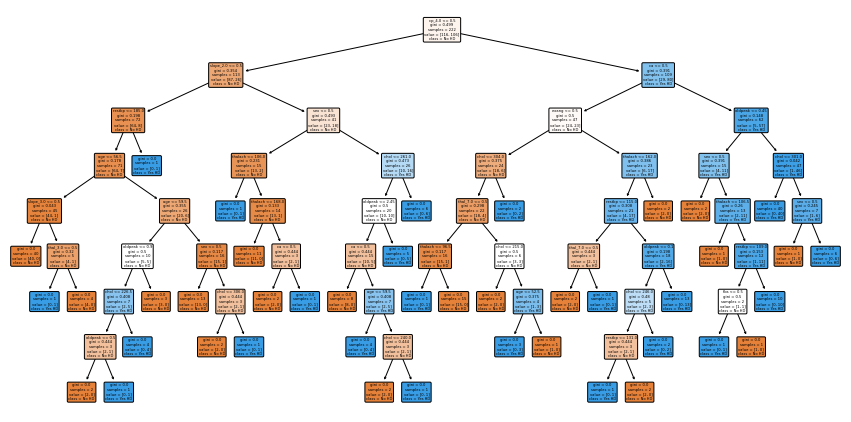

In [24]:
from sklearn import tree

plt.figure(figsize=(15,7.5))     #plotting the tree

tree.plot_tree(clf_dt, filled=True, rounded=True, class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns);


<b> We now draw a confusion matrix by running testing data down the tree</b>

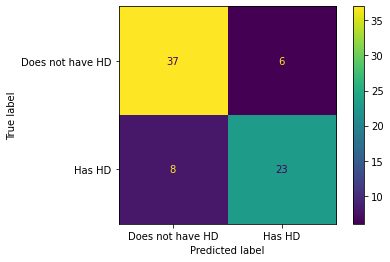

In [25]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

### Cost complexity pruning: 1. Visualize Alpha

In [26]:
path=clf_dt.cost_complexity_pruning_path(X_train, y_train)   #determining alpha values

ccp_alphas=path.ccp_alphas   #extract different values of alpha, ccp: cost complexity pruning

ccp_alphas=ccp_alphas[:-1]   #exclude maximum value for alpha

clf_dts=[]   #we create an array to put the decision tree into

#create a decision tree per alpha value and store in an array

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

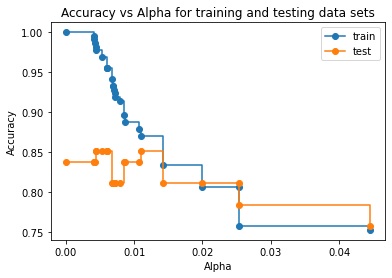

In [27]:
train_scores=[clf_dt.score(X_train, y_train) for clf_dt in clf_dts]

test_scores=[clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()

ax.set_xlabel("Alpha")

ax.set_ylabel("Accuracy")

ax.set_title("Accuracy vs Alpha for training and testing data sets")

ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")

ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")

ax.legend()

plt.show()

<b> In the above graph, the accuracy for testing data is maximum when alpha=0.015 approx. 
    After this value for alpha accuracy drops suggesting that we need to set ccp_alpha=0.015 </b>

### Cost complexity pruning: 2. Cross validation for finding best Alpha

<AxesSubplot:xlabel='tree'>

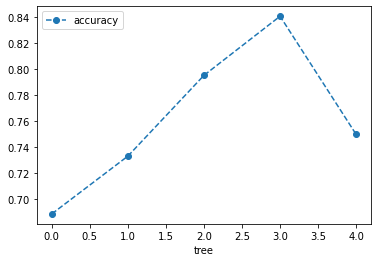

In [28]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.015)   #Create tree with alpha=0.015

#Now, we use 5 fold cross-validation to create 5 different training and testing datasets that are used to train and test the tree

scores=cross_val_score(clf_dt, X_train, y_train, cv=5)

df=pd.DataFrame(data={'tree':range(5), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')


<AxesSubplot:xlabel='alpha'>

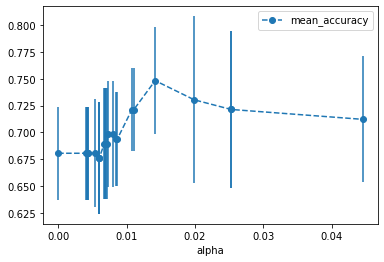

In [29]:
#create an array to store results of each fold during cross-validation

alpha_loop_values=[]

#For each value of alpha, we run 5 fold cross-validation
#We store mean and standard deviation for of scores(accuracy) for each call

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
#Now, we draw graphs of mean and standard deviation of the scores

alpha_results=pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [30]:
#Getting exact value of alpha

alpha_results[(alpha_results['alpha']>0.014)
              &
              (alpha_results['alpha']<0.015)]


,alpha,mean_accuracy,std
21,0.01419,0.748182,0.049741


In [31]:
#Storing ideal value of alpha which can be used for final tree

ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014)
                             &
                             (alpha_results['alpha']<0.015)]['alpha']

ideal_ccp_alpha

21    0.01419
Name: alpha, dtype: float64

In [32]:
#Here, ideal_ccp_alpha is a series(like an array) and we need to convert it into a float value

ideal_ccp_alpha=float(ideal_ccp_alpha)

ideal_ccp_alpha

0.014190014190014191

### Building and drawing final decision tree

In [33]:
#Building and training a new decision tree by setting alpha as ideal_alpha

clf_dt_pruned=DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)

clf_dt_pruned=clf_dt_pruned.fit(X_train, y_train)

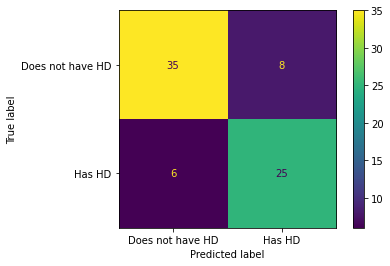

In [34]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['Does not have HD', 'Has HD'])

[Text(418.5, 356.7375, 'cp_4.0 <= 0.5\ngini = 0.499\nsamples = 222\nvalue = [116, 106]\nclass = No HD'),
 Text(167.4, 254.8125, 'slope_2.0 <= 0.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]\nclass = No HD'),
 Text(83.7, 152.8875, 'gini = 0.198\nsamples = 72\nvalue = [64, 8]\nclass = No HD'),
 Text(251.10000000000002, 152.8875, 'sex <= 0.5\ngini = 0.493\nsamples = 41\nvalue = [23, 18]\nclass = No HD'),
 Text(167.4, 50.96249999999998, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = No HD'),
 Text(334.8, 50.96249999999998, 'gini = 0.473\nsamples = 26\nvalue = [10, 16]\nclass = Yes HD'),
 Text(669.6, 254.8125, 'ca <= 0.5\ngini = 0.391\nsamples = 109\nvalue = [29, 80]\nclass = Yes HD'),
 Text(585.9, 152.8875, 'exang <= 0.5\ngini = 0.5\nsamples = 47\nvalue = [24, 23]\nclass = No HD'),
 Text(502.20000000000005, 50.96249999999998, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]\nclass = No HD'),
 Text(669.6, 50.96249999999998, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = Yes HD'

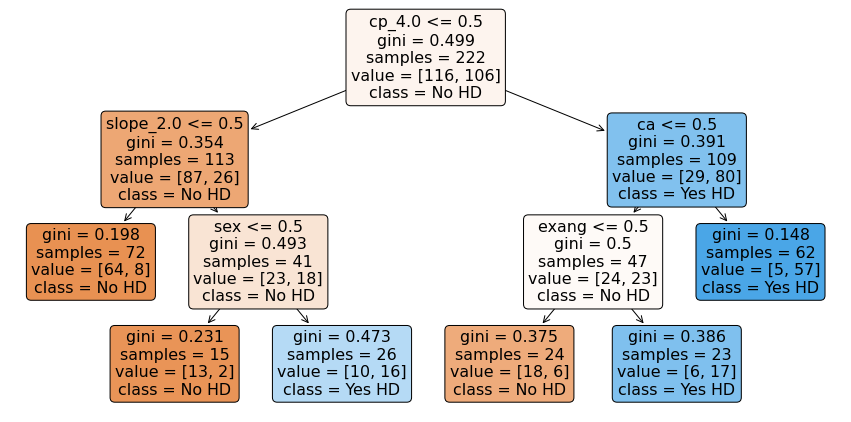

In [35]:
#We now plot the final pruned tree which is smaller than the big one

plt.figure(figsize=(15, 7.5))

plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns)